Explained Variance Ratio for each component: [0.23989488 0.18242353 0.11430148 0.10536223 0.0783315  0.05922881
 0.05164438 0.04326517 0.03554041 0.0250875  0.02264862 0.0181092
 0.0129113  0.01125099]
Cumulative Explained Variance Ratio: [0.23989488 0.42231841 0.53661988 0.64198212 0.72031362 0.77954244
 0.83118682 0.87445199 0.9099924  0.9350799  0.95772851 0.97583771
 0.98874901 1.        ]


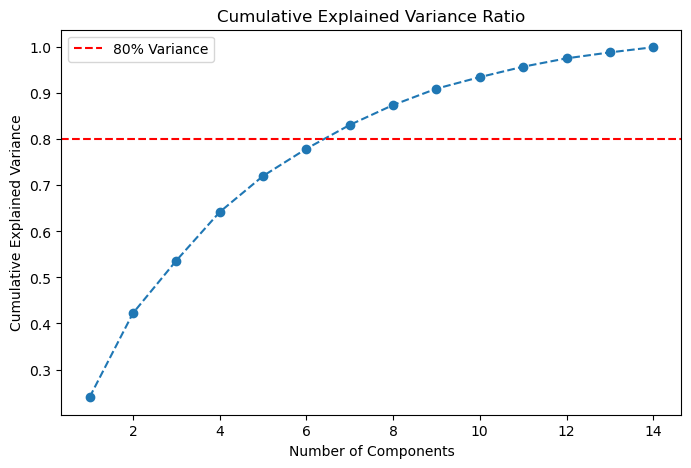

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import umap
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')

# Ensure the data is numerical and drop NaN if any
data = data.select_dtypes(include=[np.number]).dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA with more components
pca = PCA(n_components=scaled_data.shape[1])  # Use all components available
pca.fit(scaled_data)

# Calculate the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance ratio and cumulative explained variance
print(f"Explained Variance Ratio for each component: {explained_variance_ratio}")
print(f"Cumulative Explained Variance Ratio: {cumulative_variance_ratio}")

# Plot the cumulative explained variance to see how many components explain > 80%
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
plt.title("Cumulative Explained Variance Ratio")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.show()


In [2]:
# Print the principal components (7 components)
print("Principal Components (7 components):")
print(pca.components_)

# You can also label them with your feature names to make it easier to understand
feature_names = data.columns  # Assuming 'data' is your DataFrame
pca_components_df = pd.DataFrame(pca.components_, columns=feature_names)
print("\nPrincipal Components with Feature Names:")
print(pca_components_df)

Principal Components (7 components):
[[ 1.34350768e-01 -4.04343422e-01 -3.38254464e-01 -3.05908295e-01
  -9.23480938e-02 -3.49385732e-01 -1.59136814e-01 -2.02665072e-01
  -3.26552556e-01  2.37993299e-01 -3.19933053e-01 -2.33816429e-01
  -1.82712064e-01 -2.44490741e-01]
 [ 9.54661396e-02 -1.81613303e-01 -4.03360056e-01 -4.47079522e-01
   1.90511005e-01  3.44314735e-01  1.62392126e-01 -3.58969450e-01
   3.55256375e-01  5.54254111e-02  3.42793002e-01  6.13324480e-03
   4.25511178e-02  1.91341886e-01]
 [ 5.52006866e-01  1.72478236e-02  1.14268258e-01  1.02262238e-01
  -1.62885683e-03  1.15962805e-01 -3.03106746e-01  3.32455711e-01
   1.66918427e-01  5.32848792e-01  2.08290740e-01 -1.79017400e-01
  -2.34791999e-01  1.15223550e-01]
 [ 3.47077789e-01  7.17767516e-02 -6.80638794e-02 -1.43360877e-02
   4.56408767e-01 -2.50331774e-01  3.24389804e-01  1.02498518e-01
  -2.01138548e-01  1.67758943e-02 -3.25188740e-01  1.29743763e-01
   1.55782918e-01  5.43368766e-01]
 [-1.99851489e-01  2.14469174e-

Explained Variance Ratio for each component: [0.23989488 0.18242353 0.11430148 0.10536223 0.0783315  0.05922881
 0.05164438 0.04326517 0.03554041 0.0250875  0.02264862 0.0181092
 0.0129113  0.01125099]
Cumulative Explained Variance Ratio: [0.23989488 0.42231841 0.53661988 0.64198212 0.72031362 0.77954244
 0.83118682 0.87445199 0.9099924  0.9350799  0.95772851 0.97583771
 0.98874901 1.        ]


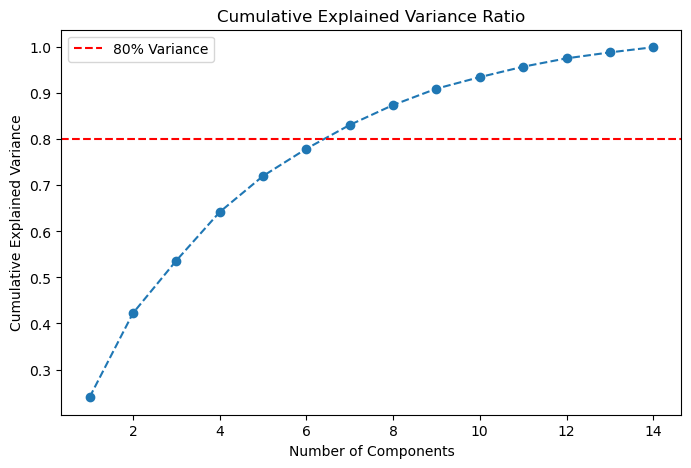

Number of components needed to explain > 80% variance: 7
Explained Variance Ratio after reducing components to 7: [0.23989488 0.18242353 0.11430148 0.10536223 0.0783315  0.05922881
 0.05164438]
Cumulative Explained Variance after reducing components: [0.23989488 0.42231841 0.53661988 0.64198212 0.72031362 0.77954244
 0.83118682]


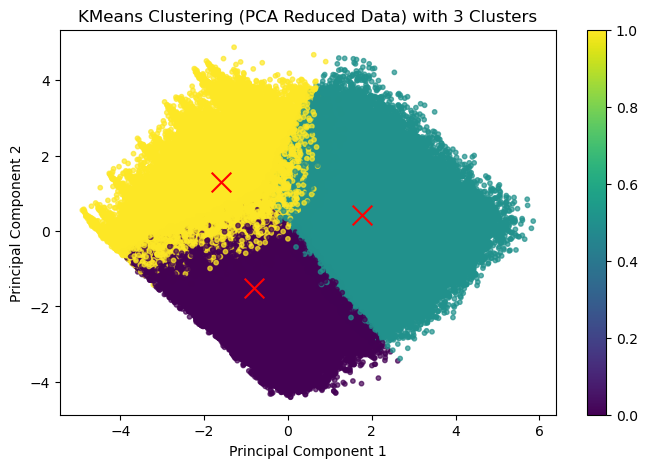

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import umap
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')

# Ensure the data is numerical and drop NaN if any
data = data.select_dtypes(include=[np.number]).dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA with more components
pca = PCA(n_components=scaled_data.shape[1])  # Use all components available
pca.fit(scaled_data)

# Calculate the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance ratio and cumulative explained variance
print(f"Explained Variance Ratio for each component: {explained_variance_ratio}")
print(f"Cumulative Explained Variance Ratio: {cumulative_variance_ratio}")

# Plot the cumulative explained variance to see how many components explain > 80%
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
plt.title("Cumulative Explained Variance Ratio")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.show()

# Decide how many components to retain based on cumulative variance ratio > 80%
n_components_needed = np.argmax(cumulative_variance_ratio >= 0.80) + 1
print(f"Number of components needed to explain > 80% variance: {n_components_needed}")

# Refit PCA with the selected number of components
pca = PCA(n_components=n_components_needed)
reduced_data = pca.fit_transform(scaled_data)

# Print the explained variance ratio after refitting
print(f"Explained Variance Ratio after reducing components to {n_components_needed}: {pca.explained_variance_ratio_}")
print(f"Cumulative Explained Variance after reducing components: {np.cumsum(pca.explained_variance_ratio_)}")

# Clustering with KMeans on reduced data
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans

# Function to calculate and plot silhouette scores for different number of clusters
def plot_silhouette_analysis(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title("Silhouette Analysis")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()
    return silhouette_scores

# Perform KMeans clustering on PCA reduced data

optimal_clusters = 3  # Choose based on elbow or silhouette analysis
kmeans = kmeans_clustering(reduced_data, optimal_clusters)
kmeans_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot clusters after PCA reduction
plt.figure(figsize=(8, 5))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=10, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')  # Plot centroids
plt.title(f"KMeans Clustering (PCA Reduced Data) with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()



In [ ]:
# run Gaussian Mixture Model (GMM) for clustering
def gmm_clustering(data, n_clusters):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(data)
    return labels

gmm_labels = gmm_clustering(reduced_data, optimal_clusters)

# Plot GMM clusters after PCA reduction
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=gmm_labels, cmap='viridis', s=10)
plt.title(f"GMM Clustering (PCA Reduced Data) with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

# Hierarchical Clustering on PCA reduced data
def hierarchical_clustering(data, n_clusters, method='ward'):
    linkage_matrix = linkage(data, method=method)
    labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # Plot dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, truncate_mode='level', p=5)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.show()
    
    return labels

hier_labels = hierarchical_clustering(reduced_data, optimal_clusters)

# Plot Hierarchical Clustering results after PCA reduction
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hier_labels, cmap='viridis', s=10)
plt.title(f"Hierarchical Clustering (PCA Reduced Data) with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import umap
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')

# Ensure the data is numerical and drop NaN if any
data = data.select_dtypes(include=[np.number]).dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA with more components
pca = PCA(n_components=scaled_data.shape[1])  # Use all components available
pca.fit(scaled_data)

# Calculate the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance ratio and cumulative explained variance
print(f"Explained Variance Ratio for each component: {explained_variance_ratio}")
print(f"Cumulative Explained Variance Ratio: {cumulative_variance_ratio}")

# Plot the cumulative explained variance to see how many components explain > 80%
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
plt.title("Cumulative Explained Variance Ratio")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.show()

# Decide how many components to retain based on cumulative variance ratio > 80%
n_components_needed = np.argmax(cumulative_variance_ratio >= 0.80) + 1
print(f"Number of components needed to explain > 80% variance: {n_components_needed}")

# Refit PCA with the selected number of components
pca = PCA(n_components=n_components_needed)
reduced_data = pca.fit_transform(scaled_data)

# Print the explained variance ratio after refitting
print(f"Explained Variance Ratio after reducing components to {n_components_needed}: {pca.explained_variance_ratio_}")
print(f"Cumulative Explained Variance after reducing components: {np.cumsum(pca.explained_variance_ratio_)}")

# Clustering with KMeans on reduced data
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels

# Function to calculate and plot silhouette scores for different number of clusters
def plot_silhouette_analysis(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title("Silhouette Analysis")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()
    return silhouette_scores

# Perform KMeans clustering on PCA reduced data
optimal_clusters = 7  # Choose based on elbow or silhouette analysis
kmeans_labels = kmeans_clustering(reduced_data, optimal_clusters)

# Plot clusters after PCA reduction
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title(f"KMeans Clustering (PCA Reduced Data) with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

# run Gaussian Mixture Model (GMM) for clustering
def gmm_clustering(data, n_clusters):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(data)
    return labels

gmm_labels = gmm_clustering(reduced_data, optimal_clusters)

# Plot GMM clusters after PCA reduction
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=gmm_labels, cmap='viridis', s=10)
plt.title(f"GMM Clustering (PCA Reduced Data) with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

# Hierarchical Clustering on PCA reduced data
def hierarchical_clustering(data, n_clusters, method='ward'):
    linkage_matrix = linkage(data, method=method)
    labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # Plot dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, truncate_mode='level', p=5)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.show()
    
    return labels

hier_labels = hierarchical_clustering(reduced_data, optimal_clusters)

# Plot Hierarchical Clustering results after PCA reduction
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hier_labels, cmap='viridis', s=10)
plt.title(f"Hierarchical Clustering (PCA Reduced Data) with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()